In [47]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Essentially: can some correlations be established between the survival rate of the Titanic passengers and various variables such as age, gender, ticket class, port of embarkment and s.o.?

In [48]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)

In [49]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## QUESTION 1

In [12]:
# Define what are the categorical features and what are the continuous features. Be sure to define ordinal vs nominal.
# Cat.Nominal: Name, Sex, Cabin, Ticket, Embarked, SibSp
# Cat.Ordinal: PassengerId, Survived, Pclass, Parch
# Continuous: Age, Fare
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# Explore the data. Print any important summary statistics. Plot the distributions of each feature. Plot any important relationships of each feature on the target variable or on each other. (You can use Seaborn as well)
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [5]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
# Display statistical information about the Age feature
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

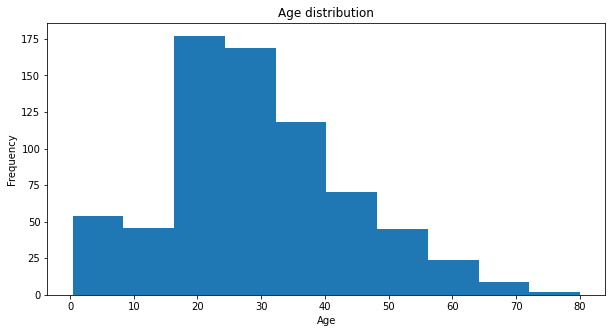

In [18]:
# plot distributions of continuous features
plt.figure(figsize= (10,5))
titanic_df.Age.plot(kind="hist")
plt.xlabel('Age')
plt.title('Age distribution')
plt.show()

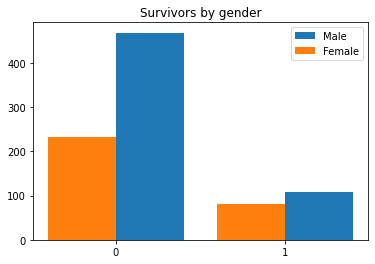

In [22]:
# Survivors by gender
males = titanic_df[titanic_df['Sex']=='male']['Survived'].value_counts()
females = titanic_df[titanic_df['Sex']=='female']['Survived'].value_counts()

figure1 = plt.bar(range(len(males)), males, align='edge', width=0.4, label='Male')
figure2 = plt.bar(range(len(females)), females, align='edge', width=-0.4, label='Female')
plt.legend()
# xlabels=['Deceased','Survived'] # Do not know how to use
plt.xticks(np.arange(len(males)), rotation=0)
plt.title("Survivors by gender")

plt.show()

## QUESTION 2

In [ ]:
# Process the data as you’ve learned in the lesson:
    # Figure out what you want to do with the nan values
    # Figure out the best way to make the categorical features numeric as we’ve learned
    # Scale the continuous features and transform or categorize any feature.
    # Deal with any outliers (both categorical and continuous)
    # Remove any columns you feel are not important and explain why => Cabin does not seem useful


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
titanic_df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [24]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
# Create a column categorizing passengers beween children and adults
titanic_df['AgeRange'] = pd.cut(titanic_df['Age'], [0, 15, 80], labels=['child', 'adult'])

In [30]:
# Get read of irrelevamt columns because of lack of statistical relevance
titanic_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [27]:
titanic_df.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


## QUESTION 4
Split the data into train and test sets.
Do it randomly and also do it by a certain feature. Explain why you chose that feature.
Don’t forget about stratifying the target variable 

In [31]:
y = titanic_df.Fare

In [34]:
x = titanic_df.drop('Fare', axis=1)

In [39]:
from sklearn.model_selection import train_test_split
# Split data randomly into train and test at a 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [40]:
print("shape of original dataset :", titanic_df.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (891, 6)
shape of input - training set (712, 5)
shape of output - training set (712,)
shape of input - testing set (179, 5)
shape of output - testing set (179,)
